Привет, меня зовут Артем Хуршудов. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

### <font color='orange'>Общее впечатление</font>
* Большое спасибо за усилия приложенные к выполнению проекта.
* Радует, что ноутбук хорошо структурирован. Приятно проверять такие работы.
* Над этим проектом придется еще немного поработать. Однако, изменения не должны занять много времени.
* С радостью отвечу на твои вопросы, если они есть. Лучше всего их собрать в следующей ячейке. Жду новую версию проекта.

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения 
    
    Просчитано на colab с использованием GPU вся выборка. Ниже исправлены ошибки по разбивке и поставлены в коментарии
    Посчитал по ограниченной выборке, решил запустить на GPU все данные
    наткнулся на ошибку, выскакивала после час расчетов. Исправил, там где расчет с batch_size
    Получились странные результаты при работе на полной выборке. Из-за объема данных не запустить тюнинг моделей

Вопросы по БЕРТу
    
input_ids = torch.tensor(padded)  
attention_mask = torch.tensor(attention_mask)  

with torch.no_grad():   
__________last_hidden_states = model(input_ids, attention_mask=attention_mask)   
__________features = last_hidden_states[0][:,0,:].numpy()  

Эта конструкция рабочая? Жалуется на память.  
Нет ли более красивого решения, чем то что реализовано в тренажнере через for
    
2. В процессе работы замечена ошибка: если размер данных не кратен batch_size  
   ошибка несоответствия длин train/target/ Попробовал исправить. В тренажере эта же ошибка 
2. Может ли БЕРТ работать с многоязычными текстами? Как определяет язык?    

3. БЕРТ сам осуществляет чистку, может имеет смысл проводить вначале ручную чистку?
</div>

### <font color='orange'>Общее впечатление и ответы (ревью 2)</font>
* После исправлений проект улучшился.
* Для удобства все новые комментарии обозначены фразой "ревью 2".
* Хоть и требуемое качество не достигнуто, но проект может быть зачтен, так как все упирается в вычислительные мощности. Освоить БЕРТ – большое достижение, молодец!
* В будущем советую начинать с tfidf подхода, так как он позволяет достичь достаточно хорошего качества за короткое время.
* Удачи в дальнейшем обучении и следующих работах!


1. Проблемы по памяти возникают из-за того, что БЕРТ очень тяжелая модель и у нас много текстов. Например, обучить его самостоятельно вряд ли получится. Это решение вполне рабочее.
2. Если я правильно тебя понял, то эта ошибка возникает из-за того, что если размер треина и теста не кратен размеру батча, то последний (неполный) батч мы просто удаляем. Удалить 100 текстов в нашем случае не критично, так что исправлять это не имеет смысла, но можно в последний батч добавить фиктивные тексты, а затем их удалить.
3. Да, может. Для него это просто разные слова, ему не нужно определять язык. Если обучать его на многоязычной выборке, то у него будут представления для слов из разных языков. Вот тут больше <a href="https://huggingface.co/bert-base-multilingual-cased">информации</a>.
4. Зависит от реализации БЕРТа, надо подробнее читать в документации. Некоторые предобученные модели требует определенной подготовки. Например, кто-то может решить обрезать все слова длиннее 10 символов при обучении и тебе нужно об этом знать перед применением этой модели. Обычно это указывают в документации.

Данные  при  параметрах по умолчанию


LGBMClassifier___________все данные________ограниченные         
F1 обучающей выборки---_____ 0.75______________1,00  
F1 тестовой выборки:----_______0.67_______________0,64  

LinearSVC    
F1 обучающей выборки:----_____ 0.73_____________ 0,99  
F1 тестовой выборки:-----______0.72_____________0,57   
  
LogisticRegression    
F1 обучающей выборки:-----_____ 0.73______________0,94  
F1 тестовой выборки: -----____ 0.73______________0,66

# Проект для «Викишоп» с BERT 
# GPU

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

In [ ]:
!pip install transformers
#!pip install torch

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import transformers

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC

from lightgbm import LGBMClassifier

from sklearn.dummy import DummyClassifier
from nltk.stem import SnowballStemmer

from sklearn.utils import shuffle
from sklearn.metrics import f1_score, confusion_matrix, recall_score, precision_score

In [ ]:
import warnings
warnings.simplefilter("ignore")

from tqdm import notebook
notebook.tqdm.pandas()

In [ ]:
def get_device():
    # Если в системе есть GPU ...
    if torch.cuda.is_available():
        # Тогда говорим PyTorch использовать GPU.
        device = torch.device("cuda")
        print('There are %d GPU(s) available.' % torch.cuda.device_count())
        print('We will use the GPU:', torch.cuda.get_device_name(0))
    # Если нет GPU, то считаем на обычном процессоре ...
    else:
        print('No GPU available, using the CPU instead.')
        device = torch.device("cpu")
    return device


device = get_device()

<div class="alert alert-block alert-success">
<b>Успех:</b> Радует, что ты не забываешь, что все импорты лучше собирать в верхней части ноутбука! 
</div>

## Подготовка

###  Анализ данных

In [ ]:
try:
    df_open = pd.read_csv('toxic_comments.csv')
except:
    try:
        df_open = pd.read_csv('/datasets/toxic_comments.csv')
    except:
        df_open = pd.read_csv('https://code.s3.yandex.net/datasets/toxic_comments.csv')

In [ ]:
display(df_open.info())
display('Количество NaN', df_open.isnull().sum())
display('Дупликаты', df_open.duplicated().sum())
display(df_open.describe().T)
display(df_open.head(10))


<div class="alert alert-block alert-success">
<b>Успех:</b> Загрузка и первичный осмотр данных проведены хорошо.
</div>

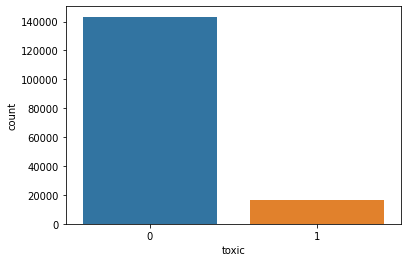

In [ ]:
sns.countplot(df_open['toxic'])


In [ ]:
df_open.groupby(['toxic']).count()

Токсичных комментариев в датасете 10%. Датасет не сбалансирован.

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что ты заметил и визуализировал дисбаланс классов.
</div>

### Подготовка данных

Так, как имеется ограничения в памяти, ограничиv датасет, взяв только часть наблюдений.  
также сбалансируем классы для модели

In [ ]:
#______________________________________________________________UPD_______________________________________
n_test=503

df_1 = df_open[df_open['toxic'] == 1].sample(n_test*2, random_state=12345)
df_0 = df_open[df_open['toxic'] == 0].sample(n_test*3, random_state=12345)

df_train = shuffle(pd.concat([df_0] + [df_1]))
df_open.drop(df_train.index, inplace = True)

df_test =df_open.sample(n_test, random_state=12345)

df=pd.concat([df_train] + [df_test]).reset_index(drop=True)

# 

In [ ]:
# df=df_open

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения создан усеченный датафрейм из изначального  
    
    единый train + test, train - сбалансированный в соотношении 2 к 3 и перемешенный, test - рандомный.
    будет произведена векторизация с помощью BERT и по окончании сново разделено на train и test  
    при параметре train_test_split (..... shuffle=False, train_size= n_test*5)
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Таким образом ты нарушаешь баланс классов во всей выборке, а значит метрики получатся завышенными. Напомню, что модифицировать баланс можно только в тренировочной чатси данных. В валидации(если она есть) и тесте он должен остаться неизменным.
</div>

<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> Разбиение проведено корректно.
</div>

### Векторизация с BERT

импортируем токенизатор для BERT'а, который превратит наши тексты в набор токенов, соответствующих тем, что встречаются в словаре предобученной модели.

In [ ]:
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')
model = transformers.BertModel.from_pretrained('bert-base-uncased')

In [ ]:
tokenized = df['text'].apply(lambda x: tokenizer.encode(x[:512], add_special_tokens=True))

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что ты разобрался с тем, что тексты нужно обрезать.
</div>

In [ ]:
# максимальное кол-во токенов в предложении
max_len = max(map(len, tokenized)) 


In [ ]:
#добавляем 0 для строк, у которых длина меньше максимальной
padded = np.array([i + [0]*(max_len - len(i)) for i in tokenized.values]) 
# создаем маску, чтобы выделить значимые токены
attention_mask = np.where(padded != 0, 1, 0)

In [ ]:
model = model.cuda()
batch_size = 200 #определяем размер батча для обработки BERT-ом
embeddings = []
for i in notebook.tqdm(range(padded.shape[0] // batch_size)):
        batch = torch.cuda.LongTensor(padded[batch_size*i:batch_size*(i+1)]) 
        attention_mask_batch = torch.cuda.LongTensor(attention_mask[batch_size*i:batch_size*(i+1)])
        
        with torch.no_grad():
            batch_embeddings = model(batch, attention_mask=attention_mask_batch)
        
        embeddings.append(batch_embeddings[0][:,0,:].cpu().numpy())

#------------------------------------ЗАПЛАТКА---------------------------------------------------------


#  досчитываем остаток от разницы длины df и 
# padded.shape[0] // batch_size, - не учитывает остаток от деления

batch = torch.cuda.LongTensor(padded[batch_size*(i+1): padded.shape[0]]) 
attention_mask_batch = torch.cuda.LongTensor(attention_mask[batch_size*(i+1): padded.shape[0]])
        
with torch.no_grad():
        batch_embeddings = model(batch, attention_mask=attention_mask_batch)
        
embeddings.append(batch_embeddings[0][:,0,:].cpu().numpy())
#________________________________________________________________________________________________________


In [ ]:
#полученные эмбеддинги будут нашими признаками для обучения модели
features = np.concatenate(embeddings) 
target = df['toxic']

<div class="alert alert-block alert-success">
<b>Успех:</b> Молодец, что разобрался с тем, как векторизовать тексты с помощью БЕРТа.
</div>

In [ ]:
#______________________________________________________________UPD_______________________________________
# разбиваем на обучающую и тестовую выборки
features_train, features_test, target_train, target_test = (
    train_test_split(features, target, shuffle=False, train_size= n_test*5))



In [ ]:
# разбиваем на обучающую и тестовую выборки
#features_train, features_test, target_train, target_test = train_test_split(features, target, random_state = 12345, test_size= 0.2)



## Обучение

In [ ]:
#обучим модель логистической регрессии на эмбеддингах
model_lr = LogisticRegression(solver='liblinear', random_state=12345)
model_lr.fit(features_train, target_train)

pred_train_lr = model_lr.predict(features_train)
pred_test_lr = model_lr.predict(features_test)

print('LogisticRegression')
print('F1 обучающей выборки: {:.2f}'.format(f1_score(target_train, pred_train_lr)))
print('F1 тестовой выборки: {:.2f}'.format(f1_score(target_test, pred_test_lr)))

In [ ]:
model_svc = LinearSVC(random_state=12345)
model_svc.fit(features_train, target_train)


pred_train_svc = model_svc.predict(features_train)
pred_test_svc = model_svc.predict(features_test)

print('LinearSVC')
print('F1 обучающей выборки: {:.2f}'.format(f1_score(target_train, pred_train_svc)))
print('F1 тестовой выборки: {:.2f}'.format(f1_score(target_test, pred_test_svc)))

In [ ]:
from lightgbm import LGBMClassifier

model_lgmc = LGBMClassifier(random_state=12345)

model_lgmc.fit(features_train, target_train)

pred_train_lgmc = model_lgmc.predict(features_train)
pred_test_lgmc = model_lgmc.predict(features_test)

print('LGBMClassifier')
print('F1 обучающей выборки: {:.2f}'.format(f1_score(target_train, pred_train_lgmc)))
print('F1 тестовой выборки: {:.2f}'.format(f1_score(target_test, pred_test_lgmc)))
        
  

In [ ]:
lg = LogisticRegression(max_iter=200)

parameters = {'C': np.linspace(0.0001, 100, 20)}
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
lg_grid = GridSearchCV(estimator=lg, param_grid=parameters, cv=5)
lg_grid.fit(features_train, target_train)


print('Лучшие параметры:', lg_grid.best_params_)

model_lr = LogisticRegression(C=5.263252631578947, solver='liblinear', random_state=12345)
model_lr.fit(features_train, target_train)

pred_train_lr = model_lr.predict(features_train)
pred_test_lr = model_lr.predict(features_test)

print('LogisticRegression')
print('F1 обучающей выборки: {:.2f}'.format(f1_score(target_train, pred_train_lr)))
print('F1 тестовой выборки: {:.2f}'.format(f1_score(target_test, pred_test_lr)))

<div class="alert alert-block alert-success">
<b>Успех:</b> Приятно видеть, что ты попробовал несколько разных моделей.
</div>

## Выводы

Мы обучили 3 модели с настройками по умолчанию.Выводы следующие:
 При использовании BERT 
Лучшей по метрикам F1 оказалась "LinearSVC" модель, которая при настройках по умолчанию показала F1 - 0.86  
Две другие модели показали похожие метрики F1, что лучше порогового 0,75

<div class="alert alert-block alert-info">
<b>Совет: </b> Финальный вывод можно было сделать чуть подробнее. Например, сказать про дисбаланс. 
    <br><br>Модель для векторизации называется BERT.
</div>

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Модели обучены
- [x]  Значение метрики *F1* не меньше 0.75
- [x]  Выводы написаны